# Procesamiento de xdasdkasjdla

## Preprocesamiento

### 1. Carga del dataset y librerias

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
sns.set_theme(style="ticks")

In [66]:
df = pd.read_csv('data/NutricionalAndPreferences/All_Diets.csv')
print(f'{len(df)} registros')
n = len(df)

7806 registros


#### 1. Descripcion del dataset

In [67]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


### 2. Valores nulos


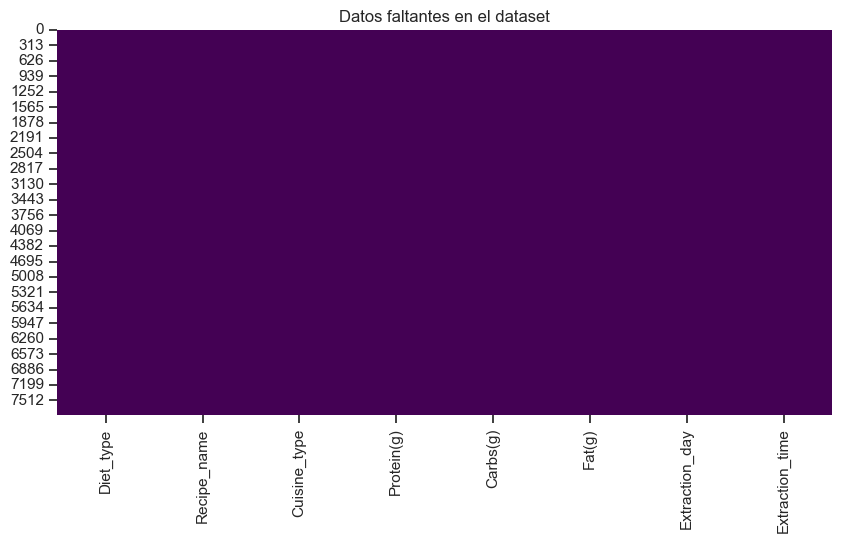

Diet_type          0
Recipe_name        0
Cuisine_type       0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64
registros nulos: 0


In [68]:
def show_missing_data(df):
    plt.figure(figsize=(10,5))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Datos faltantes en el dataset')
    plt.show()

show_missing_data(df)
print(df.isnull().sum())
print(f'registros nulos: {df.isnull().sum().sum()}')

In [69]:
print(f'Registros duplicados: {df.duplicated().sum()}')

Registros duplicados: 5


In [70]:
df[df.duplicated()]

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
2778,vegan,Strawberry Rhubarb Jam {Vegan},american,2.48,155.82,22.73,2022-10-16,20:13:34
2789,vegan,Strawberry Rhubarb Jam {Vegan},american,2.48,155.82,22.73,2022-10-16,20:13:40
4338,mediterranean,Mediterranean Marinade,mediterranean,1.50,12.79,68.75,2022-10-16,16:43:20
4412,mediterranean,Mediterranean Grain Salad,mediterranean,14.02,48.13,16.24,2022-10-16,16:43:47
5184,mediterranean,Mediterranean Dip,mediterranean,21.71,40.46,32.12,2022-10-16,16:48:18


Sin registros nulos, pero con 5 duplicados

In [71]:
n_dup_name = df[df.duplicated(subset='Recipe_name')].shape
print(f'Recetas duplicadas por nombre: {n_dup_name[0]}')

Recetas duplicadas por nombre: 744


Son demasiados, es posible que la misma receta pertenezca a mas de un tipo de dieta o tipo de cocina

In [72]:
df_dup = df[df.duplicated(subset=['Recipe_name', 'Cuisine_type', 'Diet_type'])]
n_dup_name_diet = df_dup.shape
print(f'Recetas duplicadas por nombre y tipo de cocina: {n_dup_name_diet[0]}')
print(f'Representan un {n_dup_name_diet[0] / len(df) * 100:.2f}% del total de registros')

Recetas duplicadas por nombre y tipo de cocina: 623
Representan un 7.98% del total de registros


Vamos a revisar los registros, pero esta vez incluiremos los duplicados y el original

In [73]:
df_dup = df[df.duplicated(subset=['Recipe_name', 'Cuisine_type', 'Diet_type'], keep=False)]
df_dup = df_dup.sort_values(by='Recipe_name')
df_dup.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
2094,vegan,Aloo Gobi,indian,27.03,181.02,31.83,2022-10-16,20:08:40
2046,vegan,Aloo Gobi,indian,26.33,176.83,12.93,2022-10-16,20:08:20
4299,keto,Aunt Rocky’s Colored Sprinkles (Sugar Free),american,0.00,12.00,0.00,2022-10-16,18:09:25
4283,keto,Aunt Rocky’s Colored Sprinkles (Sugar Free),american,0.00,12.00,0.00,2022-10-16,18:09:18
4294,keto,Bacon Wrapped Meatloaf,american,232.88,6.28,215.88,2022-10-16,18:09:25


Vamos a revisar si hay algun patron, en caso no encontrarlo imputaremos a un solo registro con el promedio de los valores nutricionales

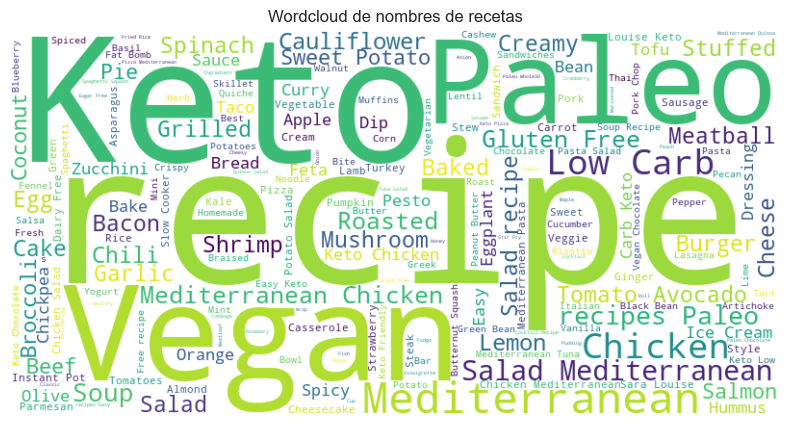

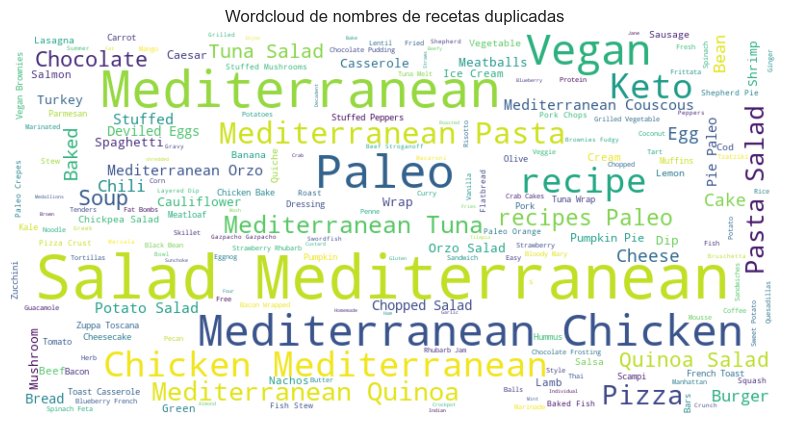

In [74]:
# mejorable

from wordcloud import WordCloud

def show_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

show_wordcloud(' '.join(df['Recipe_name']), 'Wordcloud de nombres de recetas')
show_wordcloud(' '.join(df_dup['Recipe_name']), 'Wordcloud de nombres de recetas duplicadas')

Aparentemente un wordlcoud no es la herramienta adecuada. Se procede con la imputacion por la media

In [83]:
# corregir inconsistencias por los duplicados
numeric_cols = df.select_dtypes(include='number').columns
group_cols = ['Recipe_name', 'Cuisine_type', 'Diet_type']

# Agrupar y calcular la media solo para las columnas numéricas
aux_df = df[group_cols + list(numeric_cols)].groupby(group_cols, as_index=False).mean()

# agregar las columnas que no son numéricas
non_numeric_cols = list(set(df.columns) - set(numeric_cols))
aux_df = pd.merge(aux_df, df[non_numeric_cols], on=group_cols, how='left')

n_df = len(df)
df = aux_df.copy()

df = df.drop_duplicates(subset=group_cols)  
print(f'Registros eliminados: {n_df - len(df)} ({(n_df - len(df)) / n_df * 100:.2f}%)')
print(f'Registros duplicados: {df.duplicated().sum()}')
print(f'Registros nulos: {df.isnull().sum().sum()}')


Registros eliminados: 0 (0.00%)
Registros duplicados: 0
Registros nulos: 0


## 2. Exploracion del dataset (EDA)

Para la realzacion del EDA se buscara describir a la pobalcion y a sus caracteristicas.
En este sentido se plantean las siguientes preguntas.
### Como se ecuentra distribuida la poblacion por:
1. Tipo de plato
    - Tipo de dieta
    - Tipo de cocina
2. Macronutrientes
    - Proteina
    - Carbs
    - Grasa
3. Tiempo
    - Dia de extraccion
    - Hora de extraccion


### 2.1 Tipo de plato
Tipo de dieta y cocina

C:\Users\rodyv\AppData\Local\Temp\ipykernel_20016\3106543480.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(diet_counts, palette='viridis')


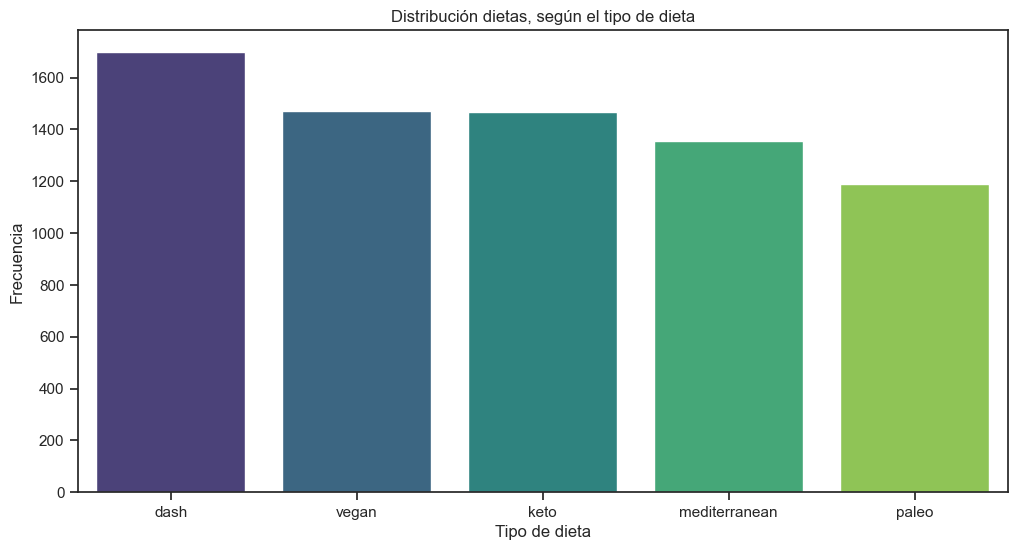

C:\Users\rodyv\AppData\Local\Temp\ipykernel_20016\3106543480.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cuisine_counts[:n_sample_cousine], palette='viridis')


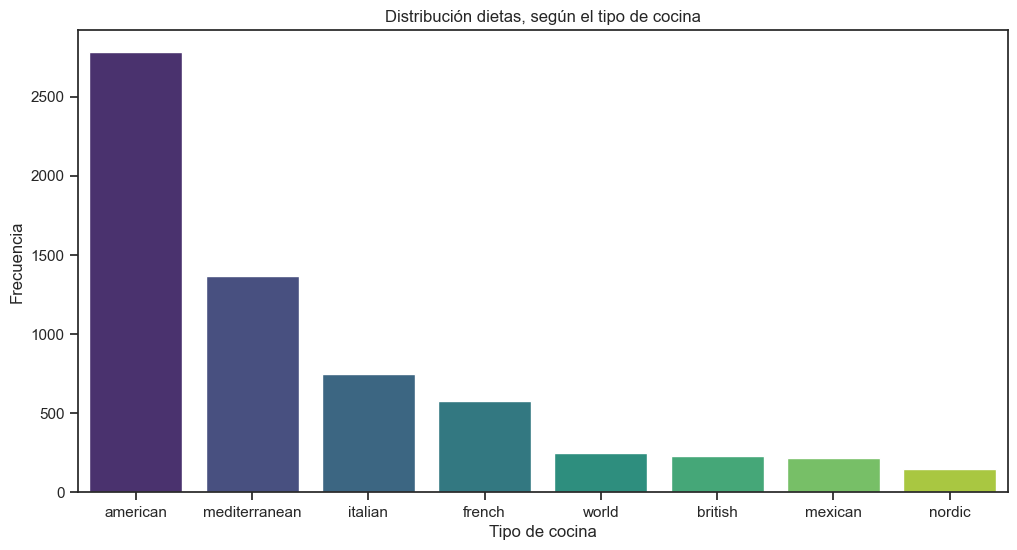

Cuisine_type
american            2781
mediterranean       1368
italian              746
french               574
world                251
british              232
mexican              217
nordic               147
south east asian     146
south american       136
asian                125
chinese              117
indian                91
middle eastern        90
eastern europe        53
japanese              50
central europe        34
caribbean             18
kosher                 7
Name: count, dtype: int64


In [88]:
diet_counts = df['Diet_type'].value_counts()
cuisine_counts = df['Cuisine_type'].value_counts()

n_sample_cousine = 8

plt.figure(figsize=(12, 6))
sns.barplot(diet_counts, palette='viridis')
plt.title('Distribución dietas, según el tipo de dieta')
plt.xlabel('Tipo de dieta')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(cuisine_counts[:n_sample_cousine], palette='viridis')
plt.title('Distribución dietas, según el tipo de cocina')
plt.xlabel('Tipo de cocina')
plt.ylabel('Frecuencia')
plt.show()

print(cuisine_counts)

1. El tipo de dieta mas comun para los platos es la dieta mediterranea y la menos comun la paleo. No se aprecian grandes diferencias entre el conjunto de datos.
2. Observamos una dominancia de la cocina americana y de la comida meditarranea